In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from matplotlib.patches import Ellipse
from matplotlib.patches import Arrow

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [47]:
def create_ellipse(mu, angle, width, height):
    # angle is plotted such that it starts from 180 and goes
    # clockwise instead of from 0 degrees and goes counter-clockwise
    # so 135 degrees -> 45 degrees
    
    # This returns the 
    return Ellipse(xy=mu, width=width*2, height=height*2, angle=angle,
                      facecolor='blue', linestyle='dotted', edgecolor='r')

def plot_ellipse(mu, sigma):  
    (w, v) = LA.eig(sigma)
    print("w: {}, v: {}".format(w, v))
    angle = np.degrees(np.arctan2(v[1, 0], v[0, 0]))
    print("angle:", angle)
    ax = plt.gca()
    ax.set_xlim(mu[0] + -1.3, mu[0] + 1.3)
    ax.set_ylim(mu[1] + -1.3, mu[1] + 1.3)
    
    ellipse = create_ellipse(mu, angle, w[0], w[1])
    ellipse.set_edgecolor('k')
    ax.add_patch(ellipse)
    print(mu)
    plt.plot(mu[0], mu[1], 'ro')

In [61]:
# Constants

# number of samples
n_samples = 1000

# ground truth state
x = np.array([-0.85, 0.25]).reshape(2, 1)

# state -> measurement map
H = np.array([1, -1]).reshape(1, 2)

# noise
R = np.eye(1) * 0.01

[[0.01]]


In [49]:
# .reshape(-1, 1) is equal to .reshape((2, 1)) and is equal to .reshape(2, 1).
# You can't do .reshape(1, 1) as this basically means create one array with one number
# which does not use the total number of provided numbers.

x_hat0 = np.array([0, 0]).reshape(-1, 1)
Q0 = np.eye(len(x_hat0))

w: [1. 1.], v: [[1. 0.]
 [0. 1.]]
0.0
[[0]
 [0]]


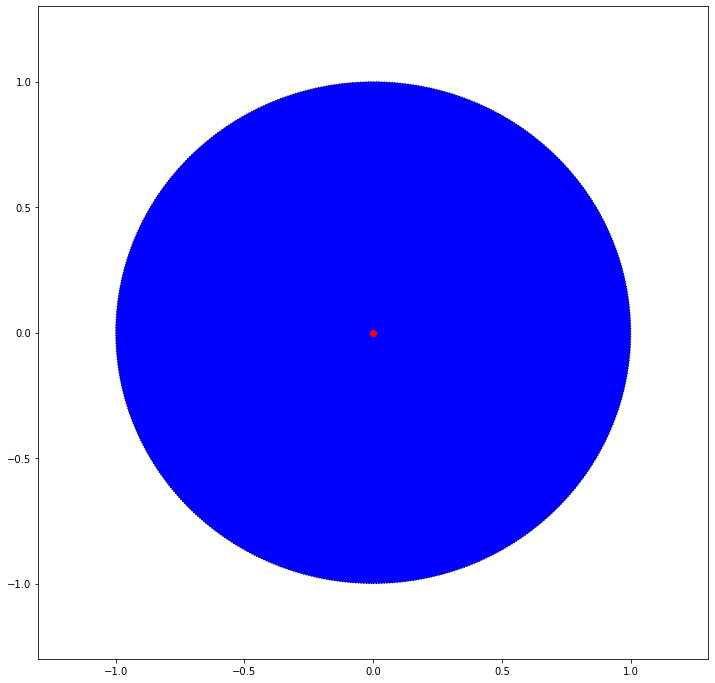

In [50]:
plot_ellipse(x_hat0, Q0)

In [62]:
def recursive_estimation(x_hat0, Q0, n_samples):
    # This is here so that as we change these values, we still have an original copy
    x_hat = np.copy(x_hat0)
    Q = np.copy(Q0)
    
    for _ in range(n_samples):
        # TODO: sample a measurement
        
        # Notes: n_samples is 1000
        # range is used to loop through the values of an array
        # x_hat0 is a array filled with two arrays each with one value
        # R is a noise or the covariance matrix 
        
        y_obs = H @ x + np.random.multivariate_normal([0.], R)
    
        # TODO: update Q and x_hat
        Q = LA.pinv(LA.pinv(Q) + H.T @ LA.pinv(R) @ H)
        x_hat = x_hat + Q @ H.T @ LA.pinv(R) @ (y_obs - H @ x_hat)
        
    return x_hat, Q

In [63]:
print( n_samples )
x_hat, Q = recursive_estimation(x_hat0, Q0, n_samples)
    
print("x =", x.squeeze())
print("x̂ =", x_hat.squeeze())
print("Hx =", H @ x.squeeze())
print("Hx̂ =", H @ x_hat.squeeze())

1000
x = [-0.85  0.25]
x̂ = [-0.55010538  0.55010538]
Hx = [-1.1]
Hx̂ = [-1.10021077]


w: [4.999975e-06 1.000000e+00], v: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
135.0000000000008
[[-0.55010538]
 [ 0.55010538]]


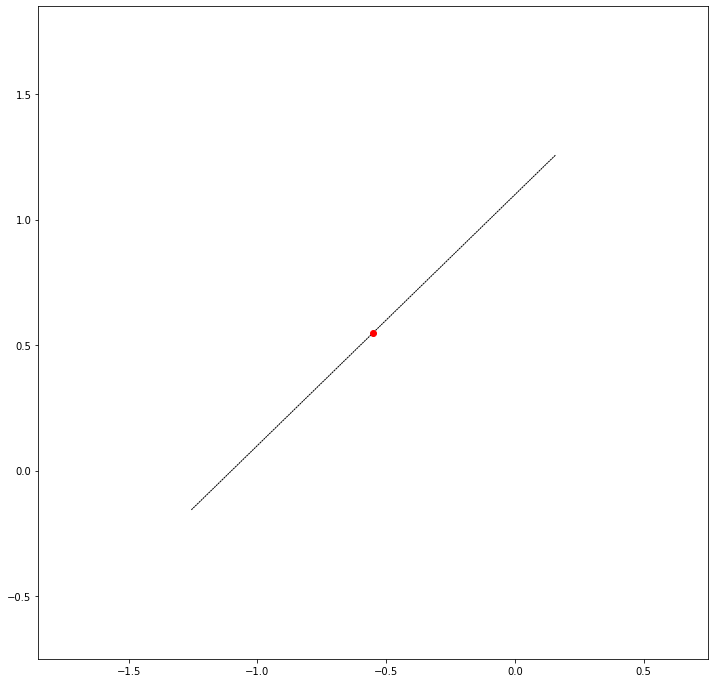

In [64]:
plot_ellipse(x_hat, Q)

In [65]:
(w, v) = LA.eig(Q)
# sync angle with plotted ellipse
angle = np.pi - np.arctan2(v[1, 0], v[0, 0])
print("eigen values", w)
print("eigen vectors", v)
print("angle", np.degrees(angle))

eigen values [4.999975e-06 1.000000e+00]
eigen vectors [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
angle 44.99999999999921


w: [4.999975e-06 1.000000e+00], v: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
135.0000000000008
[[-0.55010538]
 [ 0.55010538]]


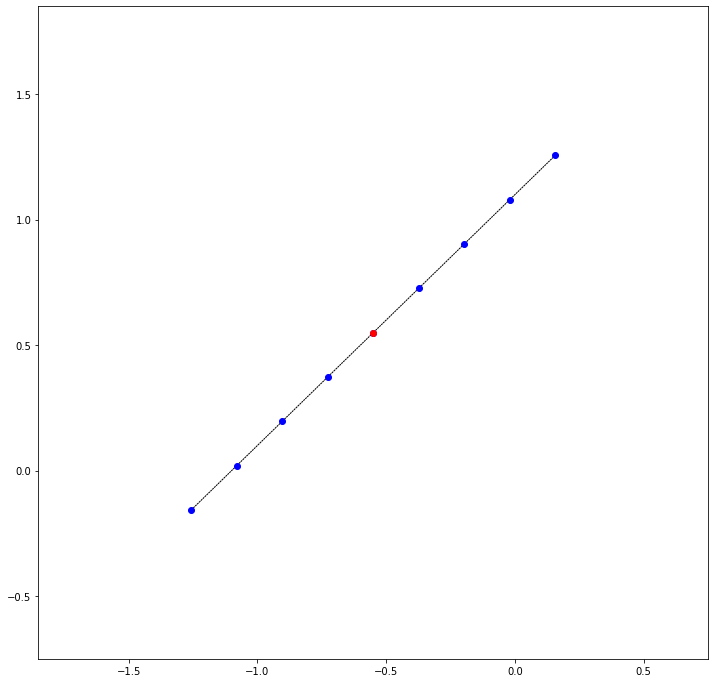

In [66]:
inputs = []
outputs = []
dt = 0.25

for v in np.arange(-1, 1+dt, dt):
    s = np.array([x_hat[0] + np.cos(angle) * v, x_hat[1] + np.sin(angle) * v])
    outputs.append(H @ s)
    inputs.append(s.reshape(1, -1))
inputs = np.array(inputs).squeeze()

plt.plot(inputs[:, 0], inputs[:, 1], 'bo')
# plot x_hat
plot_ellipse(x_hat, Q)

In [67]:
print(outputs)

[array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]]), array([[-1.10021077]])]


In [68]:
print(np.diag((1, 2, 3)))

[[1 0 0]
 [0 2 0]
 [0 0 3]]
